<a href="https://colab.research.google.com/github/kywch/StreetPsych/blob/master/visualize_expert_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outstanding questions
* Given enough participants, the ratings from Mturk seem to be highly reliable, yielding the rank correlations of .9 between two randomly splitted groups (of ~100 Ps).
* Q: To what extent each street quality is correlated with each other? Would the pattern from experts be similar or different to that from Mturk?
* Q: To what extent each expert's ratings are correlated with other expert's ratings?
* Q: What nuances can experts pick up from street images? To what extent the ratings from experts are similar or different to these from Mturk?


# Environment setup

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.cbook import flatten
from matplotlib import colors as colors
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
# download the ratings data
!rm street_psych*
!wget https://github.com/kywch/StreetPsych/raw/master/street_psych_ratings.zip

rm: cannot remove 'street_psych*': No such file or directory
--2020-11-26 20:23:58--  https://github.com/kywch/StreetPsych/raw/master/street_psych_ratings.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kywch/StreetPsych/master/street_psych_ratings.zip [following]
--2020-11-26 20:23:58--  https://raw.githubusercontent.com/kywch/StreetPsych/master/street_psych_ratings.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 642708 (628K) [application/zip]
Saving to: ‘street_psych_ratings.zip’

street_psych_rating 100%[===================>] 627.64K  --.-KB/s    in 0.03s   

2020-11-26 20:23:59 (18.7

In [3]:
!rm -rf data
!unzip street_psych_ratings.zip
!mv 02_derivatives/ data

Archive:  street_psych_ratings.zip
  inflating: 02_derivatives/Expert1_score_choice_probability.csv  
  inflating: 02_derivatives/Expert1_score_trueskill.csv  
  inflating: 02_derivatives/Expert2_score_choice_probability.csv  
  inflating: 02_derivatives/Expert2_score_trueskill.csv  
  inflating: 02_derivatives/Expert3_score_choice_probability.csv  
  inflating: 02_derivatives/Expert3_score_trueskill.csv  
  inflating: 02_derivatives/Experts_merged_score_choice_probability.csv  
  inflating: 02_derivatives/Experts_merged_score_trueskill.csv  
  inflating: 02_derivatives/Mturk_score_choice_probability.csv  
  inflating: 02_derivatives/Mturk_score_reliability_12_vs_12.csv  
  inflating: 02_derivatives/Mturk_score_reliability_24_vs_24.csv  
  inflating: 02_derivatives/Mturk_score_trueskill.csv  


In [4]:
!ls data

Expert1_score_choice_probability.csv
Expert1_score_trueskill.csv
Expert2_score_choice_probability.csv
Expert2_score_trueskill.csv
Expert3_score_choice_probability.csv
Expert3_score_trueskill.csv
Experts_merged_score_choice_probability.csv
Experts_merged_score_trueskill.csv
Mturk_score_choice_probability.csv
Mturk_score_reliability_12_vs_12.csv
Mturk_score_reliability_24_vs_24.csv
Mturk_score_trueskill.csv


# Load the ratings data

To see and sort the images by these ratings, visit
* Mturk ratings: https://kywch.github.io/StreetPsych/visualize.html
* Ratings by Expert 1: https://kywch.github.io/StreetPsych/visualize_expert1.html
* Ratings by Expert 2: https://kywch.github.io/StreetPsych/visualize_expert2.html
* Ratings by Expert 3: https://kywch.github.io/StreetPsych/visualize_expert3.html

Note that there are two different ratings. Choice probability ratings are more intuitive but skewed and discrete. TrueSkill ratings are less intuitive but more fine-grained and more normal.
* **Choice Probability**: In each trial, participants were shown 12 images in a 4x3 grid and asked to choose four images that they evaluate highly on that dimension/question. The probability of selecting each image across participants, i.e., choice probability, was used to quantify how much that image represented that dimension.  
* **TrueSkill**: The score is calculated by transforming clicks into winner (clicked) -- loser (not clicked) pairs then feeding those into the TrueSkill algorithm. http://www.moserware.com/2010/03/computing-your-skill.html, https://trueskill.org/ 


In [5]:
mturk_data = pd.read_csv('data/Mturk_score_trueskill.csv', index_col='Image_ID')
expert1_data = pd.read_csv('data/Expert1_score_trueskill.csv', index_col='Image_ID')
expert2_data = pd.read_csv('data/Expert2_score_trueskill.csv', index_col='Image_ID')
expert3_data = pd.read_csv('data/Expert3_score_trueskill.csv', index_col='Image_ID')
experts_merged = pd.read_csv('data/Experts_merged_score_trueskill.csv', index_col='Image_ID')

# Correlations between different perceptual qualities (TrueSkill)
Q: To what extent each street quality is correlated with each other? 

Observations: 
* Walkability, imagability, complexity were highly correlated with each other in both experts and Mturkers; the degree of correlations were higher in experts.
* The correlations between human scale and other qualities seem to be different between experts and Mturkers.

## The ratings from experts (merged)

Comparisons are made within the all experts results (e.g., Walkability from all experts is compared to Imageability from all experts).

Clustered dots on the lower left corner represent images that received no clicks in 6 appearances.

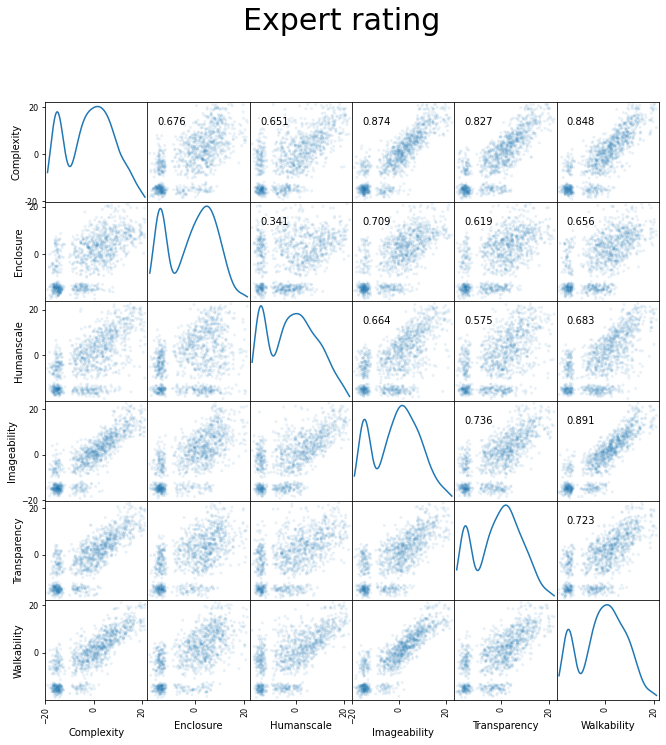

In [42]:
# Expert rating
axes = scatter_matrix(experts_merged, alpha=0.1, figsize=(11,11), diagonal='kde')
corr = experts_merged.corr(method='spearman')
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr.iloc[i,j], (0.1, 0.8), xycoords='axes fraction', ha='left', va='center')
plt.suptitle('Expert rating', y=1, fontsize=30)
plt.show()

## The ratings from Mturk

Comparisons are made within the Mturk results (e.g., Walkability from Mturk is compared to Imageability from Mturk).

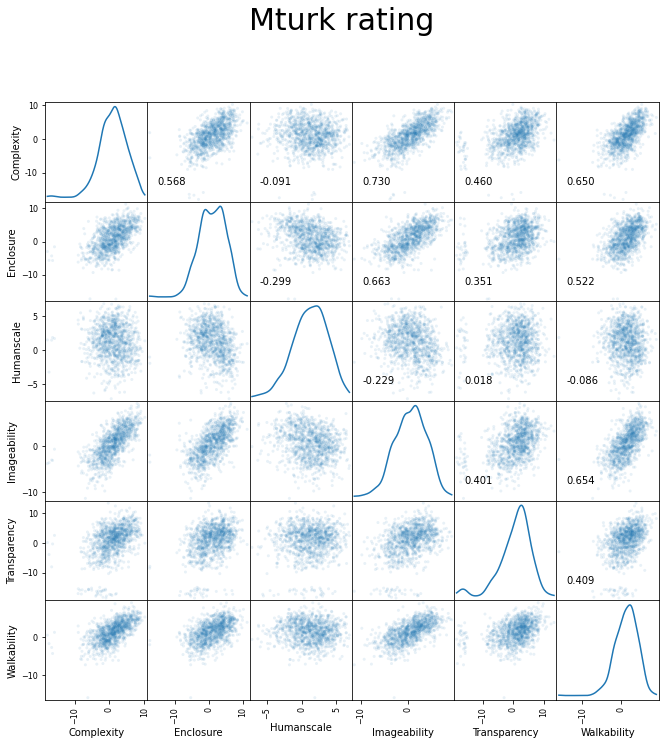

In [7]:
# Mturk rating
axes = scatter_matrix(mturk_data[experts_merged.columns], alpha=0.1, figsize=(11,11), diagonal='kde')
corr = mturk_data[experts_merged.columns].corr(method='spearman')
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr.iloc[i,j], (0.1, 0.2), xycoords='axes fraction', ha='left', va='center')
plt.suptitle('Mturk rating', y=1, fontsize=30)
plt.show()

## Q: How reliable are these ratings from Mturk?

The level of agreements between Mturk participants is obtained by calculating 2000 rank correlations between the ratings from two groups of 24 randomly-selected participants.

The Mturk rating reliability increases when there are more participants. We've seen correlations of 0.9 between the ratings from two groups of 60 Ps. 


In [8]:
tmp_rel = pd.read_csv('data/Mturk_score_reliability_24_vs_24.csv')
tmp_rel['id'] = tmp_rel.index
tmp_rel.head()

,Walkability,Preference,Imageability,Complexity,Enclosure,Transparency,Humanscale,Disorder,id
0,0.494845,0.467907,0.637839,0.731503,0.787983,0.757670,0.523404,0.704936,0
1,0.540791,0.402790,0.678313,0.720763,0.716872,0.740096,0.468172,0.698993,1
2,0.519658,0.424468,0.655003,0.716725,0.724212,0.740794,0.465782,0.692287,2
3,0.554831,0.517714,0.649134,0.704320,0.654094,0.727170,0.515873,0.650905,3
4,0.567794,0.468649,0.662368,0.721345,0.698682,0.764943,0.478140,0.691733,4


In [9]:
# converting the wide-format data to long-format
rel_24_dist = tmp_rel.melt(id_vars='id', value_vars=list(expert1_data.columns)).drop(columns=['id'])
rel_24_dist.head()

,variable,value
0,Complexity,0.731503
1,Complexity,0.720763
2,Complexity,0.716725
3,Complexity,0.704320
4,Complexity,0.721345


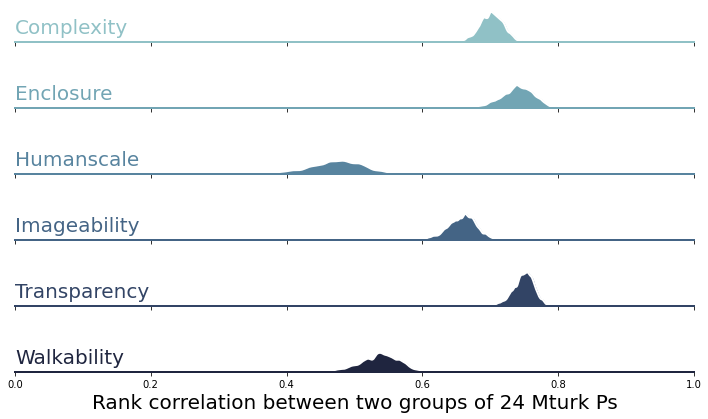

In [24]:
def draw_distribution(dist_df, desc):
  
  # Initialize the FacetGrid object
  pal = sns.cubehelix_palette(len(dist_df['variable'].unique()), rot=-.25, light=.7)
  g = sns.FacetGrid(dist_df, row="variable", hue="variable", aspect=10, height=1, palette=pal)

  # Draw the densities in a few steps
  g.map(sns.kdeplot, "value",
        bw_adjust=.5, clip_on=False,
        fill=True, alpha=1, linewidth=1)
  g.map(sns.kdeplot, "value", clip_on=False, color="w", lw=2, bw_adjust=.5)
  g.map(plt.axhline, y=0, lw=2, clip_on=False)

  # Define and use a simple function to label the plot in axes coordinates
  def label(x, color, label):
      ax = plt.gca()
      ax.text(0, .4, label, color=color, fontsize=20,
              ha="left", va="center", transform=ax.transAxes)

  g.map(label, "value")

  # Set the subplots to overlap
  #g.fig.subplots_adjust(hspace=-.1)

  # Remove axes details that don't play well with overlap
  g.set_titles("")
  g.set(xlim=(0,1), yticks=[])
  g.set_xlabels(desc, fontsize=20)
  g.despine(bottom=True, left=True)

  return g

g = draw_distribution(rel_24_dist, 'Rank correlation between two groups of 24 Mturk Ps')

plt.show()

# Between-expert rating agreements (TrueSkill)
Q: To what extent each expert's ratings are correlated with other expert's ratings?

The same type of ratings are compared between experts (e.g., Complexity from Expert 1 is compared to that from Expert 2).


## Defining the plotting function

In [25]:
def compare_ratings(base_df, base_name, comp_dfs, comp_names, col_list, 
                    base_lim = None, comp_lim = None, figsize = (18,3)):
  fig, ax = plt.subplots(len(comp_dfs), len(col_list), figsize=figsize)
  fig.subplots_adjust(wspace=.4, hspace=.4)

  if len(comp_dfs) == 1:
    ax = np.reshape(ax, (len(comp_dfs), len(col_list)))

  for irow, comp_df in enumerate(comp_dfs):
    for idx, col in enumerate(col_list):
      sns.regplot(x=base_df[col], y=comp_df[col], 
                  scatter_kws = {'alpha':0.1, 'edgecolors':None },
                  line_kws = {'color':'k'},
                  ax=ax[irow, idx])
      
      # set x, y limits
      if base_lim is not None:
        ax[irow,idx].set_xlim(base_lim)

      if comp_lim is not None:  
        ax[irow,idx].set_ylim(comp_lim)
      
      #ax[irow, idx].set_aspect('equal')

      # correlation
      rho = base_df[col].corr(comp_df[col], method='spearman')
      ax[irow, idx].annotate("%.3f" % rho, (0.05, 0.85), xycoords='axes fraction', ha='left', va='center', fontsize=16)

      # title, axis labels  
      if irow == 0:
        ax[irow, idx].set_title(col, fontsize=16)
        
      if idx == 0:
        ax[irow, idx].set_xlabel(base_name, fontsize=16)
        ax[irow, idx].set_ylabel(comp_names[irow], fontsize=16)
      else:
        ax[irow, idx].set_xlabel('')
        ax[irow, idx].set_ylabel('')

      # Move left and bottom spines outward by 10 points
      ax[irow, idx].spines['left'].set_position(('outward', 5))
      ax[irow, idx].spines['bottom'].set_position(('outward', 5))
      # Hide the right and top spines
      ax[irow, idx].spines['right'].set_visible(False)
      ax[irow, idx].spines['top'].set_visible(False)


## Experts 1 vs 2 & 3

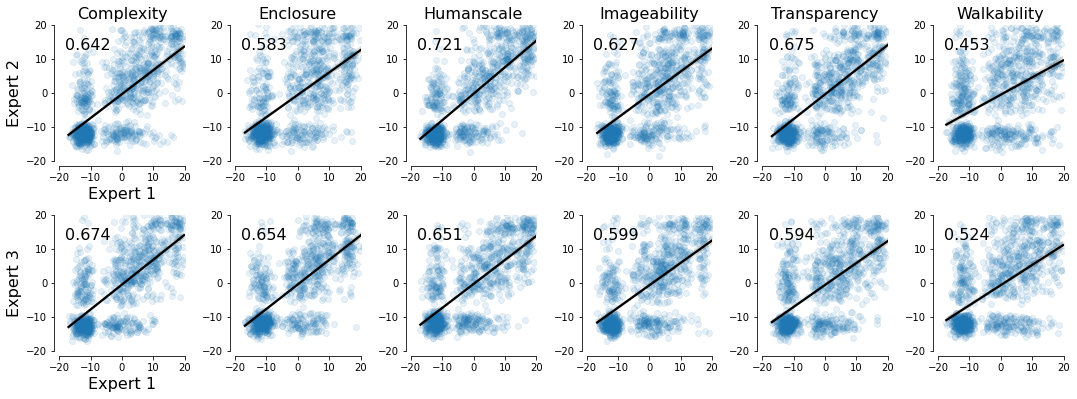

In [26]:
compare_ratings(base_df = expert1_data, base_name = 'Expert 1', base_lim = (-20,20),
                comp_dfs = [expert2_data, expert3_data], comp_names = ['Expert 2', 'Expert 3'], comp_lim = (-20,20),
                col_list = list(expert1_data.columns), figsize = (18,6))

## Experts 2 vs 3

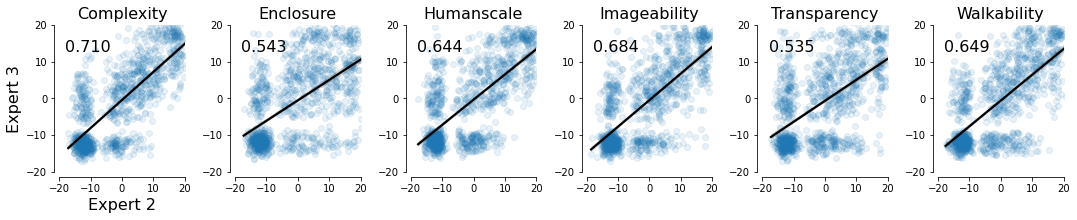

In [27]:
compare_ratings(base_df = expert2_data, base_name = 'Expert 2', base_lim = (-20,20),
                comp_dfs = [expert3_data], comp_names = ['Expert 3'], comp_lim = (-20,20),
                col_list = list(expert2_data.columns), figsize = (18,2.7))

## Q: Is the level of agreements between experts higher or lower than that between Mturk participants?

The level of agreements between Mturk participants is obtained by calculating 2000 rank correlations between the ratings from two groups of 12 randomly-selected participants.

Why 12 Mturk Ps? As each Mturk participant saw a subset of images (~700 from 1119), aggregating 12 participans would yield ~8 ratings per image. Each expert rated each image six times. 



In [28]:
tmp_rel = pd.read_csv('data/Mturk_score_reliability_12_vs_12.csv')
tmp_rel['id'] = tmp_rel.index
tmp_rel.head()

,Walkability,Preference,Imageability,Complexity,Enclosure,Transparency,Humanscale,Disorder,id
0,0.459490,0.313034,0.389021,0.576361,0.657749,0.629356,0.289929,0.605276,0
1,0.420456,0.232099,0.475835,0.522228,0.611109,0.600537,0.306872,0.576603,1
2,0.238345,0.387914,0.557669,0.610363,0.557656,0.541315,0.294267,0.539842,2
3,0.450959,0.306716,0.491450,0.555689,0.734492,0.485266,0.315595,0.498537,3
4,0.354207,0.420216,0.505512,0.520548,0.624700,0.606023,0.349295,0.451051,4


In [29]:
# converting the wide-format data to long-format
rel_12_dist = tmp_rel.melt(id_vars='id', value_vars=list(expert1_data.columns)).drop(columns=['id'])
rel_12_dist.head()

,variable,value
0,Complexity,0.576361
1,Complexity,0.522228
2,Complexity,0.610363
3,Complexity,0.555689
4,Complexity,0.520548


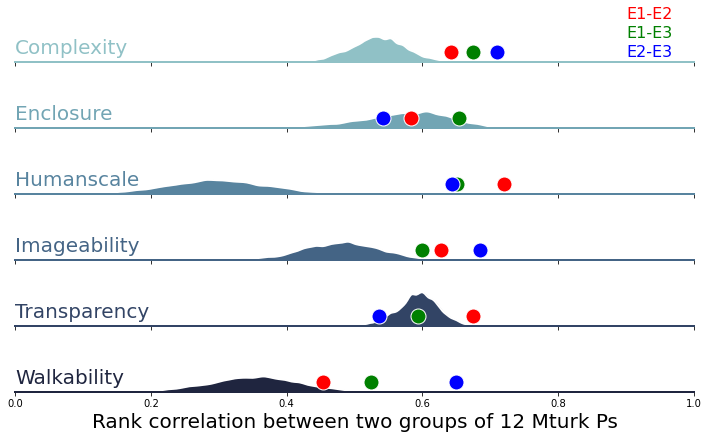

In [34]:
# plot each expert data on top of the ratings
g = draw_distribution(rel_12_dist, 'Rank correlation between two groups of 12 Mturk Ps')
col_names = list(expert1_data.columns)

for idx, ax in enumerate(list(g.axes.flat)):
  rho12 = expert1_data[col_names[idx]].corr(expert2_data[col_names[idx]], method='spearman')
  rho13 = expert1_data[col_names[idx]].corr(expert3_data[col_names[idx]], method='spearman')
  rho23 = expert2_data[col_names[idx]].corr(expert3_data[col_names[idx]], method='spearman')
  ax.plot(rho12, 4, 'ro', ms=15, mec='w')
  ax.plot(rho13, 4, 'go', ms=15, mec='w')
  ax.plot(rho23, 4, 'bo', ms=15, mec='w')
  # legend
  if idx == 0:
    ax.text(0.9, 18, 'E1-E2', fontsize=16, color='r')
    ax.text(0.9, 10, 'E1-E3', fontsize=16, color='g')
    ax.text(0.9, 2, 'E2-E3', fontsize=16, color='b')

plt.show()

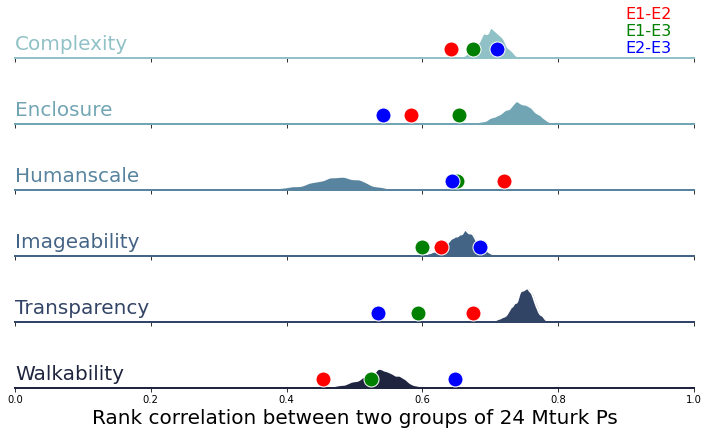

In [44]:
# plot each expert data on top of the ratings
g = draw_distribution(rel_24_dist, 'Rank correlation between two groups of 24 Mturk Ps')
col_names = list(expert1_data.columns)

for idx, ax in enumerate(list(g.axes.flat)):
  rho12 = expert1_data[col_names[idx]].corr(expert2_data[col_names[idx]], method='spearman')
  rho13 = expert1_data[col_names[idx]].corr(expert3_data[col_names[idx]], method='spearman')
  rho23 = expert2_data[col_names[idx]].corr(expert3_data[col_names[idx]], method='spearman')
  ax.plot(rho12, 7, 'ro', ms=15, mec='w')
  ax.plot(rho13, 7, 'go', ms=15, mec='w')
  ax.plot(rho23, 7, 'bo', ms=15, mec='w')
  # legend
  if idx == 0:
    ax.text(0.9, 32, 'E1-E2', fontsize=16, color='r')
    ax.text(0.9, 18, 'E1-E3', fontsize=16, color='g')
    ax.text(0.9, 4, 'E2-E3', fontsize=16, color='b')

plt.show()

Quick observations.
* **Complexity**: The agreements between experts are higher than that between 12 mturk participans (MPs) and comparable to that between 24 MPs. 
* **Enclosure**: The agreements between experts are comparable to that between 12 MPs and lower than that between 24 MPs.
* **Human scale**: The agreements between experts are much higher than that between 24 MPs.
* **Imageability**: The agreements between experts are higher than that between 12 MPs and comparable to that between 24 MPs. 
* **Transparency**: The agreements between experts are comparable to that between 12 MPs and lower than that between 24 MPs.
* **Walkability**: The agreements between experts are higher than that between 12 MPs and comparable to that between 24 MPs. 

# Mturk-expert rating agreements (TrueSkill)

Q: What nuances can experts pick up from street images? To what extent the ratings from experts are similar or different to these from Mturk?

The same type of ratings are compared between Mturk and each expert, respectively (e.g., Complexity from Mturk is compared to that from Expert 1).


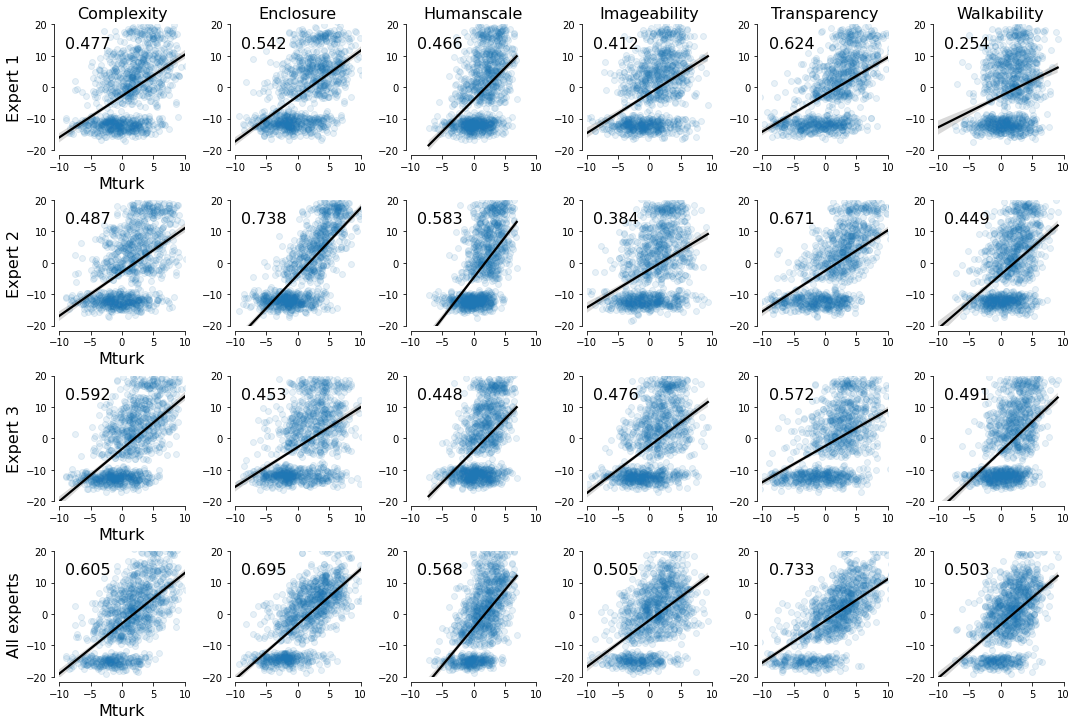

In [40]:
compare_ratings(base_df = mturk_data, base_name = 'Mturk', base_lim=(-10,10),
                comp_dfs = [expert1_data, expert2_data, expert3_data, experts_merged],
                comp_names = ['Expert 1', 'Expert 2', 'Expert 3', 'All experts'], comp_lim=(-20,20),
                col_list = list(expert1_data.columns), figsize = (18, 12))

## Q: Is the level of agreements between experts and Mturk participants higher or lower than that between Mturk participants?

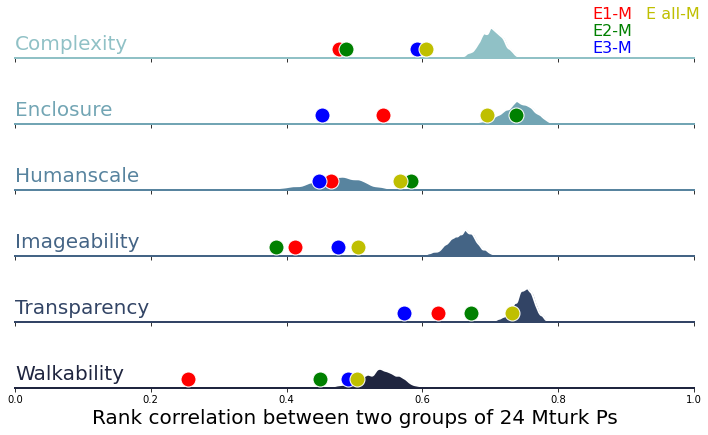

In [53]:
# plot each expert data on top of the ratings
g = draw_distribution(rel_24_dist, 'Rank correlation between two groups of 24 Mturk Ps')
col_names = list(expert1_data.columns)

for idx, ax in enumerate(list(g.axes.flat)):
  rho1 = mturk_data[col_names[idx]].corr(expert1_data[col_names[idx]], method='spearman')
  rho2 = mturk_data[col_names[idx]].corr(expert2_data[col_names[idx]], method='spearman')
  rho3 = mturk_data[col_names[idx]].corr(expert3_data[col_names[idx]], method='spearman')
  rho4 = mturk_data[col_names[idx]].corr(experts_merged[col_names[idx]], method='spearman')
  ax.plot(rho1, 7, 'ro', ms=15, mec='w')
  ax.plot(rho2, 7, 'go', ms=15, mec='w')
  ax.plot(rho3, 7, 'bo', ms=15, mec='w')
  ax.plot(rho4, 7, 'yo', ms=15, mec='w')
  # legend
  if idx == 0:
    ax.text(0.85, 32, 'E1-M', fontsize=16, color='r')
    ax.text(0.85, 18, 'E2-M', fontsize=16, color='g')
    ax.text(0.85, 4, 'E3-M', fontsize=16, color='b')
    ax.text(0.93, 32, 'E all-M', fontsize=16, color='y')

plt.show()

**Quick observations**: The agreements between experts and MPs were lower than those between MPs (split rank-correlation), execpt for human scale and walkability. 

